## Testing the BPASS isochrone at 10^8.2 years age. (Unresolved Multiplicity (Lu et al. 2013))
In this BPASS isochrone and cluster plot, I go over the BPASS isochrone for 1 billion years age, solar metallicity, AKs=0.0, and distance of 2000 parsecs from Earth. From the isochrone and cluster, we discuss several plots such as the log_g frequency distribution of the isochrone, the color magnitude diagram (B-V vs M_V), and the mass luminosity relationshi of the cluster. 


In [1]:
import spisea
from spisea import evolution, synthetic
import math
# Check if the evolution class works fine
import time
t1=time.time()
bps=evolution.BPASS()
iso1=synthetic.Isochrone_Binary(8.2, 0.0, 2000, math.log10(1), mass_sampling=1)

/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/pysynphot/locations.py:345: UserWarning: Extinction files not found in /g/lu/models/cdbs/extinction
  warnings.warn('Extinction files not found in %s' % (extdir, ))
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/pysynphot/refs.py:125: UserWarning: No thermal tables found, no thermal calculations can be performed. No files found for /g/lu/models/cdbs/mtab/*_tmt.fits
  'no thermal calculations can be performed. ' + str(e))
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/units/quantity.py:479: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/u/ryotainagaki/Desktop/PyPopStar/spisea/evolution.py:1792: RuntimeWarning: overflow encountered in power
  (1 / cs.au) * un.m)
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/units/quantity.py:479: RuntimeWarning: divide by zero encountered in true_divide
  result 

Changing to T= 50000 for T= 52330 logg=8.47
Changing to logg=5.00 for T= 52330 logg=8.47
Changing to logg=5.00 for T= 44758 logg=8.49
Changing to logg=5.00 for T= 36146 logg=8.54
Changing to logg=5.00 for T= 38774 logg=8.52
Changing to logg=5.00 for T= 38361 logg=8.50
Changing to T= 50000 for T= 73161 logg=8.45
Changing to logg=5.00 for T= 73161 logg=8.45
Changing to logg=5.00 for T= 37966 logg=5.70
Changing to logg=5.00 for T= 39842 logg=5.51
Changing to logg=5.00 for T= 32888 logg=5.68
Changing to logg=5.00 for T= 45669 logg=8.52
Changing to logg=5.00 for T= 35701 logg=8.52
Changing to logg=5.00 for T= 37547 logg=5.70
Changing to logg=5.00 for T= 45668 logg=8.52
Changing to logg=5.00 for T= 38750 logg=8.52
Changing to logg=5.00 for T= 38750 logg=8.52
Changing to logg=5.00 for T= 42302 logg=8.53
Changing to logg=5.00 for T= 38974 logg=5.38
Changing to logg=5.00 for T= 38750 logg=8.52
Changing to logg=5.00 for T= 38750 logg=8.52
Changing to logg=5.00 for T= 38750 logg=8.52
Changing to 

We check if all phases represented in the BPASS isochroneare valid.

In [2]:
import numpy as np
np.all([(x == 5 or x == 101 or x==102 or x==103) for x in iso1.primaries['phase']])

True

In [3]:
np.all([(x == 5 or x == 101 or x == 102 or x == 103) for x in iso1.singles['phase']])

True

In [4]:
np.all([(x == 5 or x == 101 or x == -99 or x==102 or x==103) for x in iso1.secondaries['phase']])

True

Find the maximum, mean, and median  values of logg (cgs) for primaries and secondaries accounting for NaNs in the columns. (For max we make NaNs the same as - infinity and for median and mean, we do not include them)

In [5]:
np.max(iso1.singles['logg'])

9.294869501162154

In [6]:
np.max(np.nan_to_num(iso1.primaries['logg'], -np.inf))

9.288600394549206

In [7]:
np.max(np.nan_to_num(iso1.secondaries['logg'], -np.inf))

9.283702439639246

Now let's find the mean and median logg values for the single stars, secondary stars, and the primary stars

In [8]:
np.mean(iso1.singles['logg'][np.where(~np.isnan(iso1.singles['logg']))])

5.354531279865074

In [9]:
np.mean(iso1.primaries['logg'][np.where(~np.isnan(iso1.primaries['logg']))])

5.109131776599373

In [10]:
np.mean(iso1.secondaries['logg'][np.where(~np.isnan(iso1.secondaries['logg']))])

4.7087761944824305

In [11]:
np.median(iso1.singles['logg'][np.where(~np.isnan(iso1.singles['logg']))])

4.2498758947769355

In [12]:
np.median(iso1.primaries['logg'][np.where(~np.isnan(iso1.primaries['logg']))])

4.133548174454043

In [13]:
np.median([x for x in iso1.secondaries['logg'] if np.isfinite(x)])

4.298445675989428

Let's make a histogram of log_g values for each table of the isochrone

Text(0.5, 0, 'logg in cgs')

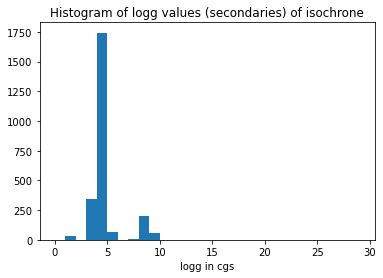

In [14]:
import matplotlib.pyplot as plt
plt.title("Histogram of logg values (secondaries) of isochrone")
plt.hist(np.array([x for x in iso1.secondaries['logg'] if np.isfinite(x)]),
         np.arange(0, 30, 1))
plt.xlabel("logg in cgs")

Text(0.5, 0, 'logg in cgs')

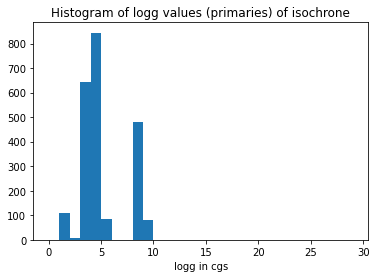

In [15]:
import matplotlib.pyplot as plt
plt.title("Histogram of logg values (primaries) of isochrone")
plt.hist(np.array([x for x in iso1.primaries['logg'] if np.isfinite(x)]),
         np.arange(0, 30, 1))
plt.xlabel("logg in cgs")

Text(0.5, 0, 'logg in cgs')

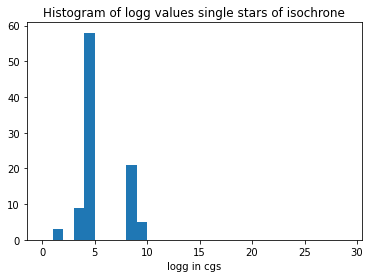

In [16]:
import matplotlib.pyplot as plt
plt.title("Histogram of logg values single stars of isochrone")
plt.hist(np.array([x for x in iso1.singles['logg'] if np.isfinite(x)]),
         np.arange(0, 30, 1))
plt.xlabel("logg in cgs")

For comparison, let's create a MIST v.1. isochrone  phot using otherwise same parameters.

In [17]:
iso2=synthetic.IsochronePhot(8.2, 0.0, 2000,
                             math.log(1), recomp=False) # New MIST v.1 isochrone for same metallicity

Note: dist/10 pc = 200 for both of our isochrones and clusters

Find the maximum logg of the isochrone and the distribution of logg values

In [18]:
np.max(iso2.points['logg'])

8.038804565028379

(array([ 96., 103.,  29.,  55., 179.,  39.,  26.,  71.,   5.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <BarContainer object of 29 artists>)

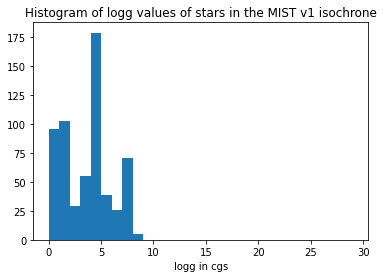

In [19]:
import matplotlib.pyplot as plt
plt.xlabel("logg in cgs")
plt.title("Histogram of logg values of stars in the MIST v1 isochrone")
plt.hist(np.array([x for x in iso2.points['logg'] if np.isfinite(x)]), np.arange(0, 30, 1))

Finding the log_g median and mean for the new isochrone

In [20]:
np.median(iso2.points['logg'])

4.190403645585174

In [21]:
np.mean(iso2.points['logg'])

3.7100077975325854

Now we want to make clusters for both of these models and plot CMD, HR Diagram, and Mass Luminosity relationship for the isochrones. Then, we want to find the Mass luminosity relationship and CMD for the cluster.

In [22]:
from spisea import imf
from spisea.imf import imf, multiplicity
from spisea import ifmr


In [23]:
clus_1=synthetic.Cluster_w_Binaries(iso1, imf.IMFSalpeter1955(multiplicity=multiplicity.MultiplicityUnresolved()),
                                    2000, ifmr=ifmr.IFMR_Spera15())
clus_2=synthetic.ResolvedCluster(iso2, imf.IMFSalpeter1955(multiplicity=multiplicity.MultiplicityUnresolved()),
                                 2000, ifmr=ifmr.IFMR_Spera15())

197 single stars had to be deleted
83.18408856407626 solar masses had to be deleted from single stars before application of the IFMR


/u/ryotainagaki/Desktop/PyPopStar/spisea/synthetic.py:728: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  compMass = np.array([compMass[x] for x in indices])


Running the changing phase on companions
84 non-single star systems had to be deleted before IFMR application
86 companions had to be deleted before IFMR was applied
Found 10 companions out of stellar mass range


Taking a look at the BPASS Cluster vs MIST Settings cluster Observer's HR Diagram
Remember to use a distance modulus!

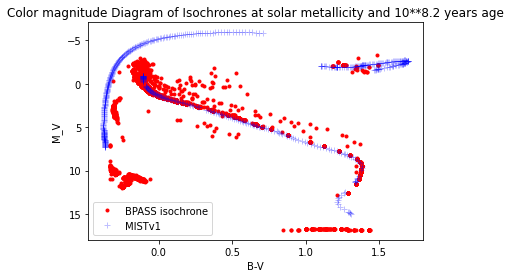

In [24]:
import matplotlib.pyplot as plt
plt.plot(iso1.primaries['m_ubv_B'] - iso1.primaries["m_ubv_V"],
         iso1.primaries["m_ubv_V"] - 5 * np.log10(200), "r.")
plt.plot(iso1.secondaries['m_ubv_B'] - iso1.secondaries["m_ubv_V"],
         iso1.secondaries["m_ubv_V"] - 5 * np.log10(200), "r.")
plt.plot(iso1.singles['m_ubv_B'] - iso1.singles["m_ubv_V"],
         iso1.singles["m_ubv_V"] - 5 * np.log10(200), "r.", label="BPASS isochrone")
plt.plot(iso2.points['m_ubv_B'] - iso2.points["m_ubv_V"],
         iso2.points["m_ubv_V"] - 5 * np.log10(200), "b+", label="MISTv1", alpha=0.25)
plt.xlabel("B-V")
plt.ylabel("M_V")
plt.title("Color magnitude Diagram of Isochrones at solar metallicity and 10**8.2 years age")
plt.gca().invert_yaxis()
plt.legend()

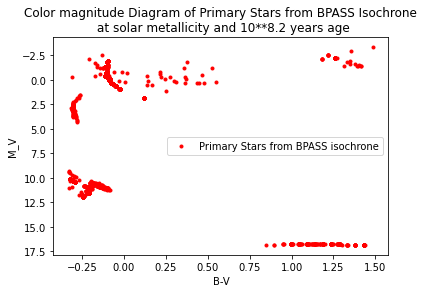

In [25]:
import matplotlib.pyplot as plt
plt.plot(iso1.primaries['m_ubv_B'] - iso1.primaries["m_ubv_V"],
         iso1.primaries["m_ubv_V"] - 5 * np.log10(200), "r.", label = "Primary Stars from BPASS isochrone")
plt.xlabel("B-V")
plt.ylabel("M_V")
plt.title("Color magnitude Diagram of Primary Stars from BPASS Isochrone\n at solar metallicity and 10**8.2 years age")
plt.gca().invert_yaxis()
plt.legend()

**Finding stars with the flat  M_V magnitudes.** This includes looking at the insides of a primary star table

In [26]:
np.unique(iso1.primaries[np.where(iso1.primaries['m_ubv_V'] -
                                  np.log10(2000 / 10) > 15.0)]['phase'])

5.0
101.0


In [27]:
iso1.primaries[np.where((iso1.primaries['m_ubv_V'] - 10 >  15.0) &
                        (iso1.primaries['phase'] == 5))]

mass,L,Teff,R,logg,isWR,mass_current,phase,source,m_ubv_U,m_ubv_V,m_ubv_B,m_ubv_R,m_ubv_I
solMass,W,K,m,,,solMass,,,,,,,
float64,float64,float64,float64,float64,bool,float64,float64,int64,float64,float64,float64,float64,float64
1.4,2.6668705105418817e+23,2738.7349246249955,81562431.48962052,4.648933553569084,False,1.625047,5.0,3,30.736724716886705,28.30405302541776,29.5903811962742,26.89041963759546,23.585313231822646
0.398107,2.6668705105418817e+23,2738.7349246249955,81562431.48962052,4.041574446625068,False,0.4013348,5.0,4,30.04258249794139,28.2985697984943,29.298820759361202,26.97921265339729,23.631401519338752
0.398107,2.6668705105418817e+23,2738.7349246249955,81562431.48962052,4.038067441246554,False,0.398107,5.0,3,30.039500251880984,28.29870157637484,29.297393942937315,26.98022805998262,23.631908766863493
3.16228,2.6668705105418817e+23,2738.7349246249955,81562431.48962052,4.938067948646069,False,3.16228,5.0,4,31.239494100070647,28.349261675092254,29.781659486302917,26.964719299904743,23.621658438647714
0.398107,2.6668705105418817e+23,2738.7349246249955,81562431.48962052,4.038067441246554,False,0.398107,5.0,4,30.039500251880984,28.29870157637484,29.297393942937315,26.98022805998262,23.631908766863493
0.501187,2.6668705105418817e+23,2738.7349246249955,81562431.48962052,4.138067424857716,False,0.501187,5.0,4,30.131014518068916,28.294950275530553,29.33883279107293,26.951640537441417,23.617537092071686
0.501187,2.6668705105418817e+23,2738.7349246249955,81562431.48962052,4.138067424857716,False,0.501187,5.0,4,30.131014518068916,28.294950275530553,29.33883279107293,26.951640537441417,23.617537092071686
3.16228,2.6668705105418817e+23,2738.7349246249955,81562431.48962052,4.938067948646069,False,3.16228,5.0,4,31.239494100070647,28.349261675092254,29.781659486302917,26.964719299904743,23.621658438647714


In [28]:
np.min(([x - 10 for x in iso1.secondaries["m_ubv_V"] if np.isfinite(x)]))

-1.4943756354369313

Plotting the HR Diagram of the Isochrones

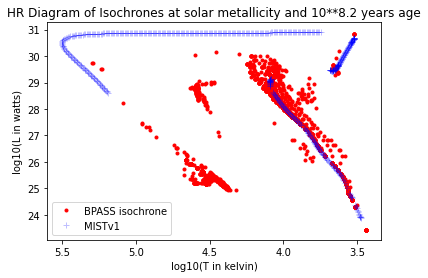

In [29]:
import matplotlib.pyplot as plt
plt.plot(np.log10(iso1.primaries['Teff']), np.log10(iso1.primaries["L"]), "r.")
plt.plot(np.log10(iso1.secondaries['Teff']), np.log10(iso1.secondaries["L"]), "r.")
plt.plot(np.log10(iso1.singles['Teff']), np.log10(iso1.singles["L"]),
         "r.", label="BPASS isochrone")
plt.plot(np.log10(iso2.points['Teff']), np.log10(iso2.points["L"]),
         "b+", label="MISTv1", alpha=0.25)
plt.xlabel("log10(T in kelvin)")
plt.ylabel("log10(L in watts)")
plt.title("HR Diagram of Isochrones at solar metallicity and 10**8.2 years age")
plt.gca().invert_xaxis()
plt.legend()
# Rough pattern seems to fit. What's that line?

Compare this to the HR diagram of the Hoki cluster (Salpeter IMF, log-age of 8.2)

In [30]:
from hoki import load
import hoki
to_dat_file_pt1 = ("/u/ryotainagaki/Desktop/" +
                   "ryotainagaki/BPASS/bpass_v2.2.1_imf135_300/" +
                   "hrs-bin-imf135_300.z020.dat")

bin_hr_diagram = load.model_output(to_dat_file_pt1,
                                   hr_type = 'TL')

/g/lu/scratch/ryotainagaki/hoki/hoki/hrdiagrams.py:435: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("Greys").copy()
  colMap.set_under(color='white')


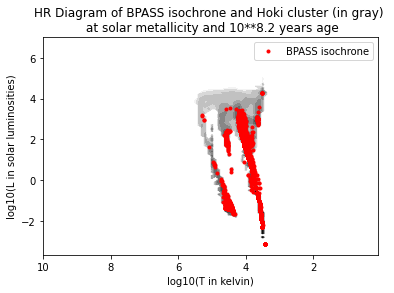

In [31]:
import matplotlib.pyplot as plt
import astropy.constants as cs
plt.plot(np.log10(iso1.primaries['Teff']), np.log10(iso1.primaries["L"]/cs.L_sun), "r.")
plt.plot(np.log10(iso1.secondaries['Teff']), np.log10(iso1.secondaries["L"]/cs.L_sun), "r.")
plt.plot(np.log10(iso1.singles['Teff']), np.log10(iso1.singles["L"]/cs.L_sun),
         "r.", label="BPASS isochrone")
bin_hr_diagram.plot(log_age=8.2)
plt.xlabel("log10(T in kelvin)")
plt.ylabel("log10(L in solar luminosities)")
plt.title("HR Diagram of BPASS isochrone and Hoki cluster (in gray) \n at solar metallicity and 10**8.2 years age")
plt.legend()


Plot the mass-luminosity relationship of the clusters (primary stars)

/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/units/quantity.py:479: RuntimeWarning: divide by zero encountered in log10
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


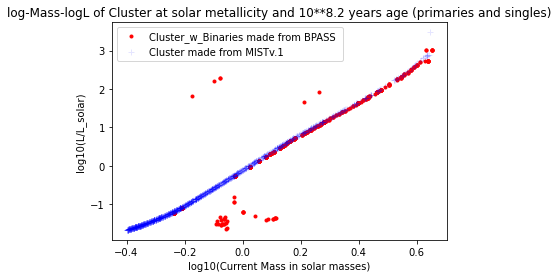

In [32]:
from astropy import constants as cs
from astropy import units as u
import matplotlib.pyplot as plt
plt.plot(np.log10(clus_1.star_systems['mass_current']),
         np.log10(clus_1.star_systems["L"] / cs.L_sun),
         "r.", label="Cluster_w_Binaries made from BPASS ", alpha =1)
plt.plot(np.log10(clus_2.star_systems['mass_current']),
         np.log10(clus_2.star_systems["L"] / (cs.L_sun * 1 / u.W)),
         "b+", label="Cluster made from MISTv.1", alpha=0.1)
plt.xlabel("log10(Current Mass in solar masses)")
plt.ylabel("log10(L/L_solar)")
plt.title("log-Mass-logL of Cluster at solar metallicity and" +
          " 10**8.2 years age (primaries and singles)")
plt.legend()
# Rough pattern seems to fit. What's that line?

Plot the mass-luminosity relationship of the isochrone

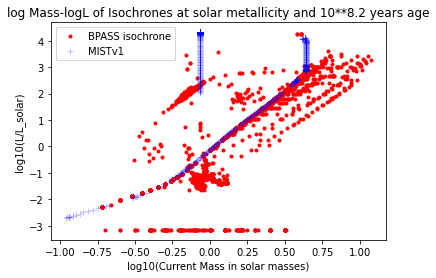

In [33]:
# Plot the mass-luminosity relationship
from astropy import constants as cs
import matplotlib.pyplot as plt
plt.plot(np.log10(iso1.primaries['mass_current']),
         np.log10(iso1.primaries["L"] / cs.L_sun), "r.")
plt.plot(np.log10(iso1.secondaries['mass_current']),
         np.log10(iso1.secondaries["L"] / cs.L_sun), "r.")
plt.plot(np.log10(iso1.singles['mass_current']),
         np.log10(iso1.singles["L"] / cs.L_sun), "r.", label="BPASS isochrone")
plt.plot(np.log10(iso2.points['mass_current']),
         np.log10(iso2.points["L"] / cs.L_sun), "b+", label="MISTv1", alpha=0.25)
plt.xlabel("log10(Current Mass in solar masses)")
plt.ylabel("log10(L/L_solar)")
plt.title("log Mass-logL of Isochrones at solar metallicity and 10**8.2 years age")
plt.legend()
# Rough pattern seems to fit. What's that line?

Examining the phases of primary stars that have luminosities of less than L_sun * 1/sqrt(2)

In [34]:
np.unique(clus_1.star_systems[np.where(np.log10(clus_1.star_systems['L'] / cs.L_sun) < -0.5)]['phase'])

/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/units/quantity.py:479: RuntimeWarning: divide by zero encountered in log10
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


5.0
101.0


Sanity check no phase 0 stars.

In [35]:
clus_1.star_systems[np.where(clus_1.star_systems['phase']==0)]

mass,systemMass,Teff,L,logg,isWR,mass_current,phase,metallicity,isMultiple,merged,m_ubv_U,m_ubv_V,m_ubv_B,m_ubv_R,m_ubv_I
solMass,solMass,K,W,,,solMass,,,,,,,,,
float64,float64,float64,float64,float64,bool,float64,float64,float64,bool,bool,float64,float64,float64,float64,float64


Taking a look at the BPASS Cluster vs MIST cluster Observer's HR Diagram
Remember to use a distance modulus!

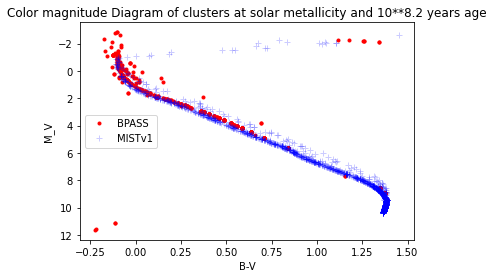

In [36]:
# Taking a look at the BPASS Cluster vs MIST cluster Observer's HR Diagram
# Remember to use a distance modulus!
import matplotlib.pyplot as plt
plt.plot(clus_1.star_systems['m_ubv_B'] - clus_1.star_systems["m_ubv_V"],
         clus_1.star_systems["m_ubv_V"] - 5 * np.log10(200), "r.",label="BPASS")
plt.plot(clus_2.star_systems['m_ubv_B'] - clus_2.star_systems["m_ubv_V"],
         clus_2.star_systems["m_ubv_V"] - 5 * np.log10(200), "b+",
         label="MISTv1", alpha=0.2)
plt.xlabel("B-V")
plt.ylabel("M_V")
plt.title("Color magnitude Diagram of clusters at solar metallicity and 10**8.2 years age")
plt.gca().invert_yaxis()
plt.legend()

One thing to note about the Cluster_w_Binaries is that it does include the units as information for columns.
The usual ResolvedCluster does not. Thus the latter has a disadvantage when we do comparisons with solar luminosity.

In any case let's compare the actual masses of the cluster

In [37]:
np.sum(clus_1.star_systems['systemMass'])

1883.874737179108

In [38]:
np.sum(clus_2.star_systems['systemMass'])

2000.5994654651365